In [1]:
!pip install pubchempy

In [2]:
pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 32.5 MB/s eta 0:00:00


Установка необходимых библиотек

In [18]:
import pandas as pd
import numpy as np

file_url = "/content/drive/MyDrive/GDSC_dataset/dataset.csv"
df = pd.read_csv(file_url)
df

,EC_number,Substrate,UniProt_ID,Protein_file,Organism_name,Km_value (mM),pH,Temperature,Site_type,Substrate_SMILES,Mol_file,pKm_value
0,1.1.1.1,octanal,P00326,1U3W.pdb,Homo sapiens,9.60,-----,21-23°C,Substrate+Cofactor,C(CCCCCCC)=O,mol_124.sdf,0.982271
1,1.1.1.1,NADH,P39462,1R37.pdb,Saccharolobus solfataricus,0.04,-----,55°C,Substrate+Cofactor,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,mol_17.sdf,-1.397940
2,1.1.1.1,NADH,P39462,1R37.pdb,Saccharolobus solfataricus,0.01,10.5,65°C,Substrate+Cofactor,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,mol_17.sdf,-2.000000
3,1.1.1.1,benzaldehyde,P39462,1R37.pdb,Saccharolobus solfataricus,0.03,10.5,65°C,Substrate+Cofactor,C(C1=CC=CC=C1)=O,mol_30.sdf,-1.522879
4,1.1.1.1,Cyclohexanol,P39462,1R37.pdb,Saccharolobus solfataricus,0.03,10.5,65°C,Substrate+Cofactor,C1(CCCCC1)O,mol_18.sdf,-1.522879
...,...,...,...,...,...,...,...,...,...,...,...,...
13486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Загрузка датасета

In [19]:
df = df.dropna()

Удаление пустых строк

In [20]:
valid_smiles = []
invalid_smiles = []

for i in df['Substrate_SMILES']:
  mol = Chem.MolFromSmiles(str(i))
  if mol:
    valid_smiles.append(i)
  else:
    invalid_smiles.append(i)

print(f"Корректных SMILES: {len(valid_smiles)}")
print(f"Некорректных SMILES: {len(invalid_smiles)}")

[12:12:58] SMILES Parse Error: extra open parentheses while parsing: C[C@]12[C@H]3CC[C@@]4([C@@H](CC[C@H]4[C@@H]3CC[C@@H]2CC(CC1)=O)O
[12:12:58] SMILES Parse Error: check for mistakes around position 22:
[12:12:58] [C@]12[C@H]3CC[C@@]4([C@@H](CC[C@H]4[C@@H
[12:12:58] ~~~~~~~~~~~~~~~~~~~~^
[12:12:58] SMILES Parse Error: Failed parsing SMILES 'C[C@]12[C@H]3CC[C@@]4([C@@H](CC[C@H]4[C@@H]3CC[C@@H]2CC(CC1)=O)O' for input: 'C[C@]12[C@H]3CC[C@@]4([C@@H](CC[C@H]4[C@@H]3CC[C@@H]2CC(CC1)=O)O'


Корректных SMILES: 5592
Некорректных SMILES: 1


Парсинг молекулярных дескрипторов субстратов производится по SMILES, перед этим сделаена проверка на их корректность. Найден 1 некорректный, при парсинге напишем функцию, которая пропускает некорректный SMILES и ставит NaN

In [21]:
from rdkit import Chem
from rdkit.Chem import Lipinski, Descriptors, MolSurf

df['RingCount'] = 0
df['AromaticRings'] = 0
df['HeteroAtoms'] = 0
df['AliphaticRings'] = 0
df['SaturatedRings'] = 0
df['RotatableBonds'] = 0
df['AmideBonds'] = 0
df['HBD'] = 0
df['HBA'] = 0
df['NHOHCount'] = 0
df['NumHeterocycles'] = 0
df['MolMR'] = 0
df['TPSA'] = 0
df['PEOE_VSA1'] = 0
df['PEOE_VSA2'] = 0
df['PEOE_VSA3'] = 0
df['PEOE_VSA4'] = 0
df['PEOE_VSA5'] = 0
df['PEOE_VSA6'] = 0
df['PEOE_VSA7'] = 0
df['PEOE_VSA8'] = 0
df['PEOE_VSA9'] = 0
df['PEOE_VSA10'] = 0
df['PEOE_VSA11'] = 0
df['PEOE_VSA12'] = 0
df['PEOE_VSA13'] = 0
df['SMR_VSA1'] = 0
df['SMR_VSA2'] = 0
df['SMR_VSA3'] = 0
df['SMR_VSA4'] = 0
df['SMR_VSA5'] = 0

for i in range(len(df)):
  smiles = df['Substrate_SMILES'][i]
  mol = Chem.MolFromSmiles(smiles)
  if mol is None:
        # Если SMILES некорректный, ставим NaN и пропускаем
        df.loc[i, [
            'RingCount','AromaticRings','HeteroAtoms','AliphaticRings',
            'SaturatedRings','RotatableBonds','AmideBonds','HBD','HBA',
            'NHOHCount','NumHeterocycles','MolMR','TPSA',
            'PEOE_VSA1','PEOE_VSA2','PEOE_VSA3','PEOE_VSA4','PEOE_VSA5',
            'PEOE_VSA6','PEOE_VSA7','PEOE_VSA8','PEOE_VSA9','PEOE_VSA10',
            'PEOE_VSA11','PEOE_VSA12','PEOE_VSA13',
            'SMR_VSA1','SMR_VSA2','SMR_VSA3','SMR_VSA4','SMR_VSA5'
        ]] = np.nan
        continue
  ring = Lipinski.RingCount(mol)
  aromatic = Lipinski.NumAromaticRings(mol)
  atoms = Lipinski.NumHeteroatoms(mol)
  df.loc[i, 'RingCount'] = ring
  df.loc[i, 'AromaticRings'] = aromatic
  df.loc[i, 'HeteroAtoms'] = atoms
  df.loc[i, 'AliphaticRings'] = Lipinski.NumAliphaticRings(mol)
  df.loc[i, 'SaturatedRings'] =  Lipinski.NumSaturatedRings(mol)
  df.loc[i, 'RotatableBonds'] = Lipinski.NumRotatableBonds(mol)
  df.loc[i, 'AmideBonds'] = Lipinski.NumAmideBonds(mol)
  df.loc[i, 'HBD'] = Lipinski.NumHDonors(mol)
  df.loc[i, 'HBA'] = Lipinski.NumHAcceptors(mol)
  df.loc[i, 'NHOHCount'] = Lipinski.NHOHCount(mol)
  df.loc[i,'NumHeterocycles'] = Lipinski.NumHeterocycles(mol)
  df.loc[i, 'MolMR'] =  Descriptors.MolMR(mol)
  df.loc[i, 'TPSA'] = Descriptors.TPSA(mol)
  df.loc[i, 'PEOE_VSA1'] = MolSurf.PEOE_VSA1(mol)
  df.loc[i, 'PEOE_VSA2'] = MolSurf.PEOE_VSA2(mol)
  df.loc[i, 'PEOE_VSA3'] = MolSurf.PEOE_VSA3(mol)
  df.loc[i, 'PEOE_VSA4'] = MolSurf.PEOE_VSA4(mol)
  df.loc[i, 'PEOE_VSA5'] = MolSurf.PEOE_VSA5(mol)
  df.loc[i, 'PEOE_VSA6'] = MolSurf.PEOE_VSA6(mol)
  df.loc[i, 'PEOE_VSA7'] = MolSurf.PEOE_VSA7(mol)
  df.loc[i, 'PEOE_VSA8'] = MolSurf.PEOE_VSA8(mol)
  df.loc[i, 'PEOE_VSA9'] = MolSurf.PEOE_VSA9(mol)
  df.loc[i, 'PEOE_VSA10'] = MolSurf.PEOE_VSA10(mol)
  df.loc[i, 'PEOE_VSA11'] = MolSurf.PEOE_VSA11(mol)
  df.loc[i, 'PEOE_VSA12'] = MolSurf.PEOE_VSA12(mol)
  df.loc[i, 'PEOE_VSA13'] = MolSurf.PEOE_VSA13(mol)
  df.loc[i, 'SMR_VSA1'] = MolSurf.SMR_VSA1(mol)
  df.loc[i, 'SMR_VSA2'] = MolSurf.SMR_VSA2(mol)
  df.loc[i, 'SMR_VSA3'] = MolSurf.SMR_VSA3(mol)
  df.loc[i, 'SMR_VSA4'] = MolSurf.SMR_VSA4(mol)
  df.loc[i, 'SMR_VSA5'] = MolSurf.SMR_VSA5(mol)
df

/tmp/ipython-input-742450439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RingCount'] = 0
/tmp/ipython-input-742450439.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AromaticRings'] = 0
/tmp/ipython-input-742450439.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

,EC_number,Substrate,UniProt_ID,Protein_file,Organism_name,Km_value (mM),pH,Temperature,Site_type,Substrate_SMILES,...,PEOE_VSA9,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,SMR_VSA1,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5
0,1.1.1.1,octanal,P00326,1U3W.pdb,Homo sapiens,9.6000,-----,21-23°C,Substrate+Cofactor,C(CCCCCCC)=O,...,0.000000,6.286161,0.000000,0.000000,0.000000,4.794537,0.0,0.000000,0.000000,45.448667
1,1.1.1.1,NADH,P39462,1R37.pdb,Saccharolobus solfataricus,0.0400,-----,55°C,Substrate+Cofactor,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,...,19.541084,48.467819,23.920842,5.907180,0.000000,66.969418,0.0,24.418945,5.733667,55.500422
2,1.1.1.1,NADH,P39462,1R37.pdb,Saccharolobus solfataricus,0.0100,10.5,65°C,Substrate+Cofactor,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,...,19.541084,48.467819,23.920842,5.907180,0.000000,66.969418,0.0,24.418945,5.733667,55.500422
3,1.1.1.1,benzaldehyde,P39462,1R37.pdb,Saccharolobus solfataricus,0.0300,10.5,65°C,Substrate+Cofactor,C(C1=CC=CC=C1)=O,...,0.000000,6.286161,0.000000,0.000000,0.000000,4.794537,0.0,0.000000,0.000000,0.000000
4,1.1.1.1,Cyclohexanol,P39462,1R37.pdb,Saccharolobus solfataricus,0.0300,10.5,65°C,Substrate+Cofactor,C1(CCCCC1)O,...,6.103966,0.000000,0.000000,0.000000,0.000000,5.106527,0.0,0.000000,0.000000,38.208075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5588,6.4.1.2,ATP,Q00955,5CSL.pdb,Saccharomyces cerevisiae,0.0530,7.5,-----,Substrate+Cofactor,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...,...,12.934202,30.155920,17.692941,0.000000,0.000000,61.363719,0.0,19.519035,0.000000,24.539800
5589,6.4.1.3,propionyl-CoA,Q9X4K7,1XNY.pdb,Streptomyces coelicolor,0.0760,7.6,30°C,Substrate+Cofactor,C(CC)(=O)SCCNC(CCNC([C@@H](C(COP(OP(OC[C@@H]1[...,...,19.541084,36.259886,22.808218,11.814359,0.000000,80.484193,0.0,30.152612,5.414990,64.256622
5590,6.4.1.3,butyryl-CoA,Q9X4K7,1XNY.pdb,Streptomyces coelicolor,0.1040,7.6,30°C,Substrate+Cofactor,C(CCC)(=O)SCCNC(CCNC([C@@H](C(COP(OP(OC[C@@H]1...,...,19.541084,36.259886,22.808218,11.814359,0.000000,80.484193,0.0,30.152612,5.414990,70.677443
5591,6.5.1.1,ATP,A0A0A6YVN6,4D05.pdb,Psychromonas sp. SP041,0.0038,-----,30°C,Substrate_only,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...,...,12.934202,30.155920,17.692941,0.000000,0.000000,61.363719,0.0,19.519035,0.000000,24.539800


Произвели парсинг 30 структурных и электронных дескрипторов субстрата

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler

structure_desc = ['RingCount', 'AromaticRings', 'HeteroAtoms', 'AliphaticRings', 'SaturatedRings', 'RotatableBonds',
                  'AmideBonds', 'HBD', 'HBA', 'NHOHCount', 'NumHeterocycles']
str_corr = df[structure_desc + ['pKm_value']].corr()['pKm_value'].drop('pKm_value').sort_values(ascending=False)
str_corr

,pKm_value
AmideBonds,-0.071132
HBD,-0.091016
NHOHCount,-0.101959
SaturatedRings,-0.136094
HBA,-0.161853
RotatableBonds,-0.182220
AliphaticRings,-0.186961
HeteroAtoms,-0.188033
NumHeterocycles,-0.203975
AromaticRings,-0.258061


Дескрипторы разделены на 2 части: структурные и электронные. Сначала была проанализирована корреляция между структурными дескрипторами и целевой переменной pKm_value.

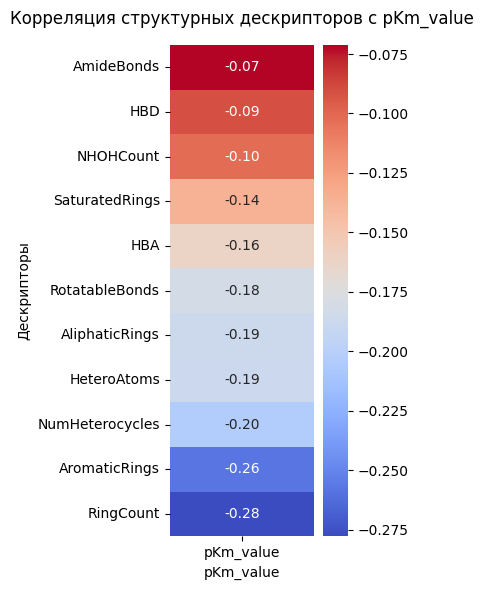

In [23]:
plt.figure(figsize=(4, 6))
sns.heatmap(
    str_corr.to_frame(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar=True
)
plt.title('Корреляция структурных дескрипторов с pKm_value', pad=15)
plt.xlabel('pKm_value')
plt.ylabel('Дескрипторы')
plt.tight_layout()
plt.show()

Для лучшего понимания результат был визуализирован с помощью тепловой матрицы. Наблюдается слабая отрицательная корреляция.

In [24]:
elec_desc = ['MolMR', 'TPSA', 'PEOE_VSA1', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8',
             'PEOE_VSA9', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'SMR_VSA1', 'SMR_VSA2', 'SMR_VSA3',
             'SMR_VSA4', 'SMR_VSA5']

elec_corr = df[elec_desc + ['pKm_value']].corr()['pKm_value'].drop('pKm_value').sort_values(ascending=False)
elec_corr

,pKm_value
SMR_VSA2,0.018615
PEOE_VSA5,-0.031014
PEOE_VSA10,-0.047203
PEOE_VSA1,-0.072658
PEOE_VSA12,-0.074710
PEOE_VSA13,-0.089898
PEOE_VSA4,-0.114325
SMR_VSA1,-0.116270
SMR_VSA4,-0.137878
PEOE_VSA11,-0.145265


Повторили пункты с электронными дескрипторами.

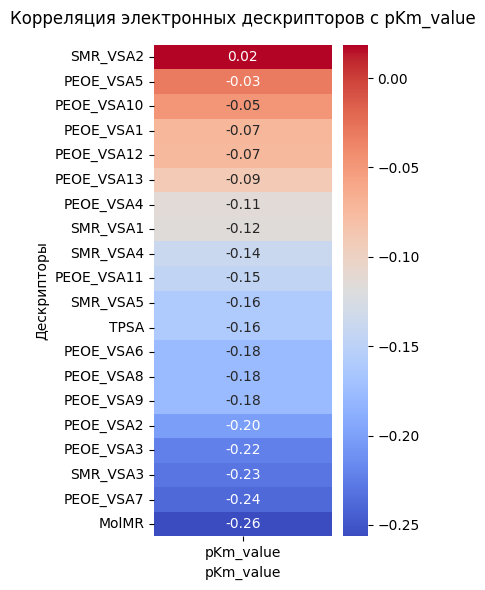

In [26]:
plt.figure(figsize=(4, 6))
sns.heatmap(
    elec_corr.to_frame(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar=True
)
plt.title('Корреляция электронных дескрипторов с pKm_value', pad=15)
plt.xlabel('pKm_value')
plt.ylabel('Дескрипторы')
plt.tight_layout()
plt.show()

Здесь также наблюдаяется слабая отрицательная корреляция.

In [27]:
df.to_csv('df.csv', index=False)

Сохраняем датафрейм для следующей части анализа